<a href="https://colab.research.google.com/github/ImranNust/AppliedDataScience-CapstonProject/blob/main/Chapter4/Module2_WorkingWith3DImages(VolumetricData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> <b> <u> Important Points </u> </b> </center> </h1>



* In some contexts, such as medical imaging applications involving, say, CT (computed tomography) scans, we typically deal with sequences of images stacked along the head-to-foot axis, each corresponding to a slice across the human body. In CT scans, the intensity represents the density of the different parts of the body -- lungs, fat, water, muscle, and bone, in order of increasing density—mapped from dark to bright when the CT scan is displayed on a clinical workstation. The density at each point is computed from the amount of X-rays reaching a detector after crossing through the body, with some complex math to deconvolve the raw sensor data into the full volume.

* CTs have only a single intensity channel, similar to a grayscale image. This means that often, the channel dimension is left out in native data formats; so, the raw data typically has three dimensions. By stacking individual 2D
slices into a 3D tensor, we can build volumetric data representing the 3D anatomy of a subject. Unlike what we see in normal 2D images taken using ordinory cameras, the extra dimension in the following figure represents
an offset in physical space, rather than a particular band of the visible spectrum.

![](https://raw.githubusercontent.com/ImranNust/DeepLearningWithPyTorch/main/Images/Figure42.png)

  there’s no fundamental difference between a tensor storing volumetric
data versus image data. We just have an extra dimension, depth, after the channel dimension, leading to a 5D tensor of shape $N \times C \times D \times H \times W$.
---


<h2> <center> <b> <u> Loading a specialized format </u> </b> </center> </h2>

Let’s load a sample CT scan using the `volread` function in the `imageio` module, which takes a directory as an argument and assembles all Digital Imaging and Communications in Medicine (DICOM) files in a series in a NumPy 3D array.

---

In [1]:
import imageio
try:
  print("[INFO] Images folder already exists; therefore, reading the image directly")
  dir_path = "/content/volumetric-dicom/LUNG"
  vol_arr = imageio.volread(dir_path, 'DICOM')
 
except:
  print("[INFO] Images folder does not exist; therefore, dowonloading it.. cheers...")
  !git clone https://github.com/ImranNust/DeepLearningWithPyTorch
  !mv DeepLearningWithPyTorch/Images/volumetric-dicom .
  !rm -rf DeepLearningWithPyTorch
  dir_path = "/content/volumetric-dicom/LUNG"
  vol_arr = imageio.volread(dir_path, 'DICOM')
 


print('Our Downloaded Data has a Size: {}'.format(vol_arr.shape))

[INFO] Images folder already exists; therefore, reading the image directly
[INFO] Images folder does not exist; therefore, dowonloading it.. cheers...
Cloning into 'DeepLearningWithPyTorch'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 181 (delta 2), reused 2 (delta 0), pack-reused 129
Receiving objects: 100% (181/181), 36.39 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Reading DICOM (examining files): 1/99 files (1.0%)34/99 files (34.3%)73/99 files (73.7%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 2/99  (2.0%)28/99  (28.3%)52/99  (52.5%)70/99  (70.7%)99/99  (100.0%)
Our Downloaded Data has a Size: (99, 512, 512)


---

The layout is different from what PyTorch expects, due to having no channel information. So we’ll have to make room for the channel dimension using `unsqueeze`:

In [2]:
import torch
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

print('The new shape is {}'.format(vol.shape))

The new shape is torch.Size([1, 99, 512, 512])


At this point we could assemble a 5D dataset by stacking multiple volumes along the batch direction, just as we did in the [previous module](https://github.com/ImranNust/DeepLearningWithPyTorch/blob/main/Chapter4/Module1_WorkingWithImages.ipynb) for 2D images.

---

Let's dispaly a few images...

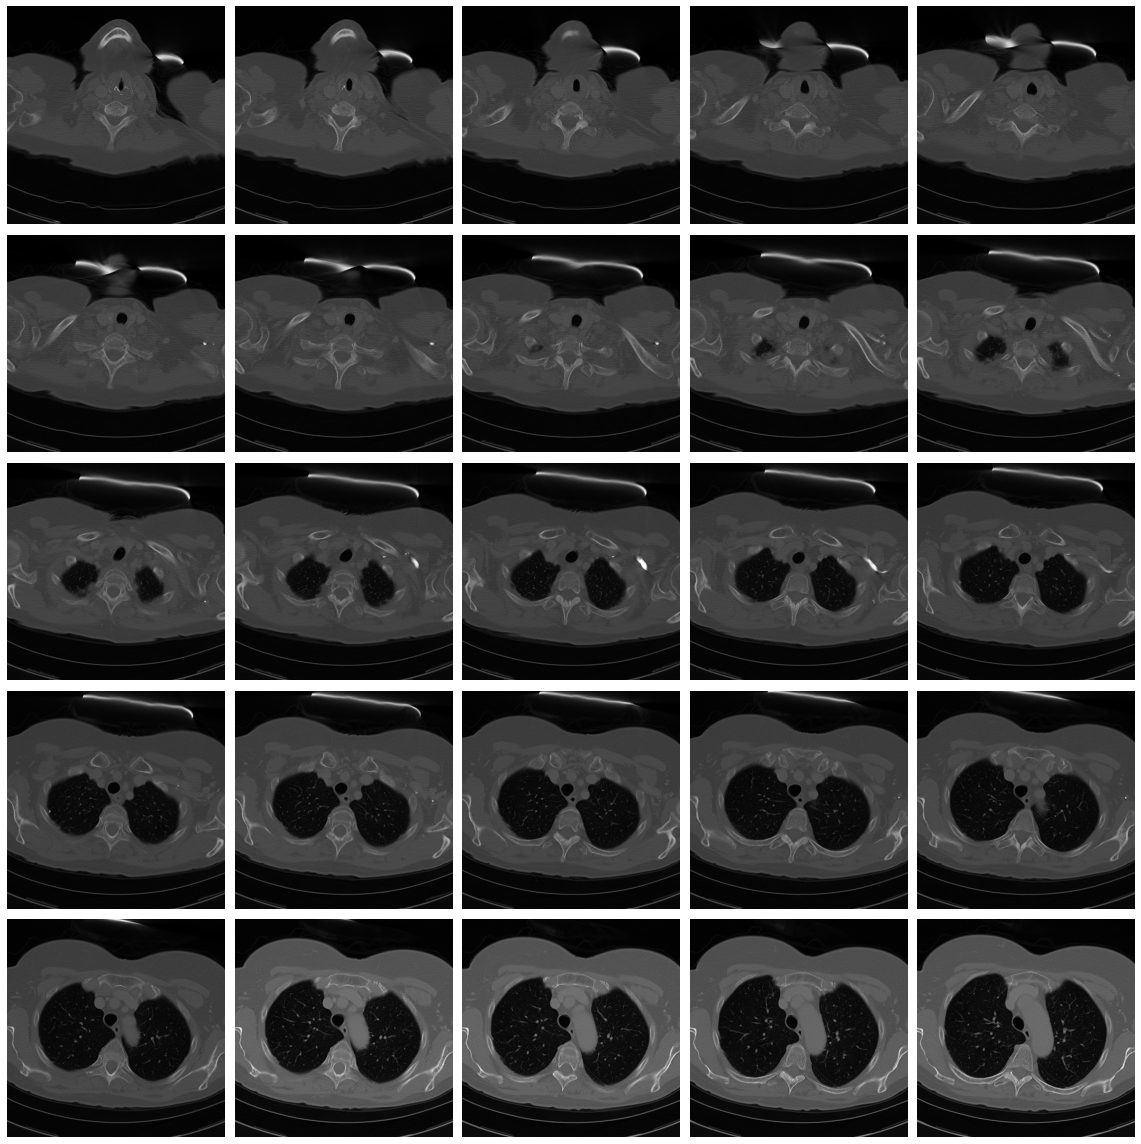

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=[16, 16])
for i in range(25):
  img = vol[0,i,:,:].numpy()
  plt.subplot(5, 5, i+1)
  plt.imshow(img, cmap = 'gray');
  plt.axis(False);

plt.tight_layout()